In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
import seaborn as sb
import mglearn

In [2]:
Books=pd.read_csv('Books.csv')
Users=pd.read_csv('Users.csv')
Ratings=pd.read_csv('Ratings.csv')


C:\Users\manje\AppData\Local\Temp\ipykernel_26248\3501426757.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books=pd.read_csv('Books.csv')


In [3]:
Books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
Books.rename(columns={'Book-Title':'book_title'},inplace=True)

In [5]:
Users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [6]:
Ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [7]:
print(list(Ratings.columns))

['User-ID', 'ISBN', 'Book-Rating']


In [8]:
print(Books.shape)
print(Ratings.shape)
print(Users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [9]:
Books.isnull().sum()

ISBN                   0
book_title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
print (Books.duplicated('book_title').sum(),
Users.duplicated().sum(),
Ratings.duplicated().sum())

29225 0 0


# Popularity based recommendation system
##Recommend those books which has more 250 ratings based on their average rating

In [13]:
#Merging Books AND Ratings
Ratings_with_name = Ratings.merge(Books,on='ISBN')
Ratings_with_name.rename(columns={'Book-Title':'book_title'},inplace=True)
Ratings_with_name

,User-ID,ISBN,Book-Rating,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [14]:
#calculating number of ratings on each book
num_of_ratings = Ratings_with_name.groupby('book_title').count()['Book-Rating'].reset_index()
#Groupby title as we have many books having similar names but different ISBN(PK)
#rest_index is to get data frame 
num_of_ratings.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_of_ratings=num_of_ratings.sort_values('num_ratings',ascending=False)
num_of_ratings

,book_title,num_ratings
234951,Wild Animus,2502
196326,The Lovely Bones: A Novel,1295
183573,The Da Vinci Code,898
5303,A Painted House,838
199237,The Nanny Diaries: A Novel,828
...,...,...
147559,Real Love: The Truth About Finding Uncondition...,1
147558,Real Love: The Drawings for Sean,1
147557,"Real Love or Fake (Camfield Novel of Love, No 78)",1
63664,Fabulous Food for Family and Friends: Healthy ...,1


In [15]:
#another df with additional column Avg Rating
avg_ratings = Ratings_with_name.groupby('book_title').mean()['Book-Rating'].reset_index()
avg_ratings.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_ratings

,book_title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
popular_df=num_of_ratings.merge(avg_ratings, on='book_title')
popular_df

,book_title,num_ratings,avg_ratings
0,Wild Animus,2502,1.019584
1,The Lovely Bones: A Novel,1295,4.468726
2,The Da Vinci Code,898,4.642539
3,A Painted House,838,3.231504
4,The Nanny Diaries: A Novel,828,3.530193
...,...,...,...
241066,Real Love: The Truth About Finding Uncondition...,1,0.000000
241067,Real Love: The Drawings for Sean,1,10.000000
241068,"Real Love or Fake (Camfield Novel of Love, No 78)",1,5.000000
241069,Fabulous Food for Family and Friends: Healthy ...,1,0.000000


In [18]:
pop_df = popular_df.drop(['book_title'],axis=1)

In [19]:
#measure of popularity 0 to 1 - 1 is most popular
movienormalizedratings = pop_df.apply(lambda x: (x-np.min(x)) /(np.max(x)-np.min(x)))
movienormalizedratings                                        

,num_ratings,avg_ratings
0,1.000000,0.101958
1,0.517393,0.446873
2,0.358657,0.464254
3,0.334666,0.323150
4,0.330668,0.353019
...,...,...
241066,0.000000,0.000000
241067,0.000000,1.000000
241068,0.000000,0.500000
241069,0.000000,0.000000


In [20]:
#Keep the books whose rating is greater than 250
popular_df=popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings',ascending=False)

In [21]:
popular_df.merge(Books,on='book_title').drop_duplicates('book_title')[['ISBN','book_title','Book-Author','Year-Of-Publication','num_ratings','avg_ratings']]

,ISBN,book_title,Book-Author,Year-Of-Publication,num_ratings,avg_ratings
0,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,428,5.852804
3,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,387,5.824289
5,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,278,5.737410
9,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,347,5.501441
13,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,556,5.183453
...,...,...,...,...,...,...
716,0380730138,Vinegar Hill (Oprah's Book Club (Paperback)),A. Manette Ansay,1998,265,2.245283
717,0440216745,Whispers,BELVA PLAIN,1994,286,2.199301
727,0446359866,Presumed Innocent,Scott Turow,1989,294,2.139456
733,0425182908,Isle of Dogs,Patricia Cornwell,2002,288,2.000000


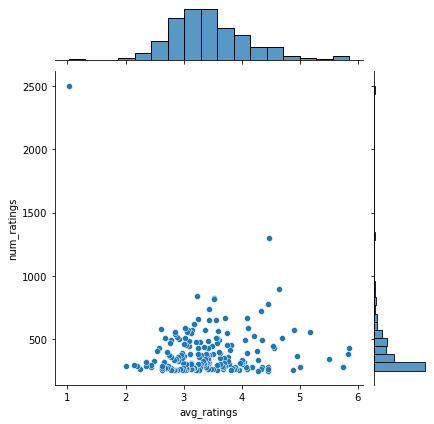

In [22]:
import seaborn as sns
sns.jointplot(x='avg_ratings',y='num_ratings',data=popular_df)

<AxesSubplot:xlabel='avg_ratings', ylabel='num_ratings'>

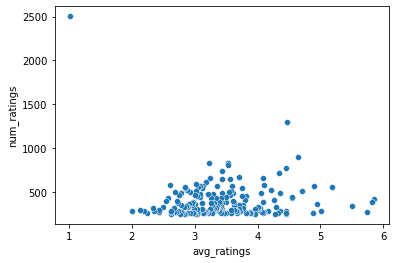

In [72]:
sns.scatterplot(x='avg_ratings',y='num_ratings',data=popular_df)

# Collaborative Based Recommender System
##Valuing the experienced users i.e., consider ratings of those users who gave ratings on more than 200 books, considers those books having atleast 50 ratings
#ignore remaining users and books

In [24]:
Ratings_with_name

,User-ID,ISBN,Book-Rating,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [25]:
x=Ratings_with_name.groupby('User-ID').count()['Book-Rating']>200
# x[x]
valuable_users=x[x].index
valuable_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [26]:
#filtering those data from ratings_with_name where users given ratings to more than 200  books
filtered_data=Ratings_with_name[Ratings_with_name['User-ID'].isin(valuable_users)]
#from 10l, we got only 4l valuable users details
filtered_data

,User-ID,ISBN,Book-Rating,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [27]:
#filtering the filtered_data to fetch books which has rating more than 50  (filtered data contains only the details of those books read by popular users and their ratings)
y=filtered_data.groupby('book_title').count()['Book-Rating']>=50
y[y]
famous_books=y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='book_title', length=706)

In [28]:
final_data=filtered_data[filtered_data['book_title'].isin(famous_books)]
final_data

,User-ID,ISBN,Book-Rating,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [29]:
final_data.drop_duplicates()

,User-ID,ISBN,Book-Rating,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [30]:
final_data.dtypes

User-ID                 int64
ISBN                   object
Book-Rating             int64
book_title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [31]:
categorical = ['book_title','ISBN','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']
onehot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',onehot,categorical)],remainder='passthrough')

In [32]:
transformmed_X = transformer.fit_transform(final_data)
transformmed_X

<58586x10120 sparse matrix of type '<class 'numpy.float64'>'
	with 541761 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformmed_X, final_data['Book-Rating'], test_size=0.3, random_state=42)

In [73]:
from sklearn.svm import SVC

In [75]:
clf=SVC()
clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
score

0.7535275375512062

C:\Users\manje\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


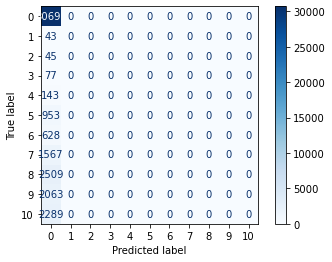

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_train,y_train,cmap='Blues')
plt.show()

In [54]:
##Converting the rating table into 2D matrix. The matrix will be sparse coz not every user gives rating

In [55]:
Pivot_table = final_data.pivot_table(index='book_title',columns='User-ID',values='Book-Rating')
Pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
book_title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [56]:
Pivot_table.fillna(0,inplace=True)
Pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
book_title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(Pivot_table)

In [58]:
book_sparse

<706x810 sparse matrix of type '<class 'numpy.float64'>'
	with 14289 stored elements in Compressed Sparse Row format>

In [59]:
# from sklearn.neighbors import NearestNeighbors
# model_knn = NearestNeighbors(n_clusters ='cosine', algorithm ='auto')
# model_knn.fit(X_train,X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(metric='cosine')
model_knn.fit(X_test,y_test)

KNeighborsClassifier(metric='cosine')

In [61]:
y = model_knn.predict(X_test)
y

array([ 0,  0,  0, ...,  6, 10,  0], dtype=int64)

In [62]:
print(format(np.mean(y == y_test)))

0.9071461083295402


In [63]:
print(model_knn.score(X_test,y_test))

0.9071461083295402


In [64]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(metric='cosine')
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='cosine')

In [65]:
# z = model_knn.predict(X_train)
# z

In [66]:
# print(format(np.mean(z == y_train)))

In [67]:
print(model_knn.score(X_train,y_train))

0.9359424530602292


In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
scores = cross_val_score(model_knn, transformmed_X, final_data['Book-Rating'])
scores

array([0.89614269, 0.89621917, 0.90219339, 0.90048647, 0.90023043])

In [70]:
from sklearn.model_selection import cross_validate
res = cross_validate(model_knn, transformmed_X, final_data['Book-Rating'], cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.02355862, 0.02301073, 0.02467084, 0.02958345, 0.02544832]),
 'score_time': array([53.23151898, 52.43987203, 53.26719308, 52.14630842, 51.42206669]),
 'test_score': array([0.89614269, 0.89621917, 0.90219339, 0.90048647, 0.90023043]),
 'train_score': array([0.93966032, 0.94083509, 0.94134716, 0.94047238, 0.94072841])}

# Cosine_similairy

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores=cosine_similarity(book_sparse)
similarity_scores

In [58]:
pd.DataFrame(similarity_scores)


,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,1.000000,0.102550,0.012209,0.000000,0.053672,0.027749,0.082165,0.137329,0.032617,0.036676,...,0.052372,0.011402,0.009687,0.125306,0.009099,0.058641,0.017696,0.121104,0.073476,0.043160
1,0.102550,1.000000,0.236457,0.000000,0.109538,0.100929,0.117862,0.187620,0.096589,0.047161,...,0.066278,0.077286,0.152550,0.084055,0.063633,0.052353,0.193097,0.074461,0.167739,0.142634
2,0.012209,0.236457,1.000000,0.000000,0.069090,0.105591,0.000000,0.107744,0.067022,0.041682,...,0.153473,0.183089,0.019906,0.148580,0.018697,0.068549,0.165654,0.045588,0.049386,0.107961
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.111582,0.000000,0.000000,0.074396,0.000000,...,0.000000,0.000000,0.000000,0.011948,0.123486,0.108638,0.076242,0.000000,0.000000,0.000000
4,0.053672,0.109538,0.069090,0.000000,1.000000,0.101331,0.096270,0.039933,0.074522,0.000000,...,0.076387,0.082158,0.022133,0.075816,0.025587,0.000000,0.098488,0.040017,0.112841,0.015204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.058641,0.052353,0.068549,0.108638,0.000000,0.064919,0.000000,0.131434,0.126245,0.072397,...,0.181184,0.000000,0.000000,0.000000,0.071845,1.000000,0.000000,0.000000,0.081330,0.000000
702,0.017696,0.193097,0.165654,0.076242,0.098488,0.119383,0.080976,0.052059,0.097149,0.169927,...,0.202358,0.159737,0.028853,0.061184,0.027101,0.000000,1.000000,0.052168,0.194303,0.190658
703,0.121104,0.074461,0.045588,0.000000,0.040017,0.094787,0.042405,0.051525,0.197962,0.000000,...,0.039791,0.048550,0.028558,0.198973,0.026824,0.000000,0.052168,1.000000,0.070851,0.019618
704,0.073476,0.167739,0.049386,0.000000,0.112841,0.112250,0.153617,0.070702,0.131941,0.087917,...,0.110764,0.046122,0.039187,0.083096,0.036807,0.081330,0.194303,0.070851,1.000000,0.106030


In [59]:

def recommend(Book_Name):
    index=np.where(Pivot_table.index==Book_Name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    for i in similar_items:
        print(Pivot_table.index[i[0]])
    

In [60]:
recommend('A Bend in the Road') #train

A Walk to Remember
The Last Time They Met : A Novel
Sea Glass: A Novel
Angels
Family Album


In [61]:
np.where(Pivot_table.index=='A Bend in the Road')[0][0]

4

In [62]:
sorted(list(enumerate(similarity_scores[4])),key=lambda x:x[1],reverse=True)[1:6]

[(24, 0.29562611831779734),
 (564, 0.2914214164983908),
 (418, 0.26043350404519483),
 (43, 0.25099279007642467),
 (186, 0.2463168732398502)]

In [63]:
recommend('Harry Potter and the Prisoner of Azkaban (Book 3)') #test

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


In [64]:
# np.where(Pivot_table.index=='House of Sand and Fog')[0][0]

In [65]:
# sorted(list(enumerate(similarity_scores[251])),key=lambda x:x[1],reverse=True)[1:6]

In [66]:
# np.where(Pivot_table.index=='Watership Down')[0][0]

# Pearson 

In [67]:
similarity=Pivot_table.corr()
similarity

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
User-ID,,,,,,,,,,,,,,,,,,,,,
254,1.000000,-0.017732,-0.023122,0.101724,-0.007722,-0.030183,-0.005456,0.172549,-0.016105,0.051974,...,0.110333,-0.024758,-0.025093,0.020826,-0.033999,0.052911,0.158014,-0.023143,-0.014278,-0.014956
2276,-0.017732,1.000000,0.103787,-0.011795,-0.006524,-0.025499,0.341600,-0.024792,-0.013606,-0.019470,...,-0.022839,-0.020915,0.122943,-0.024402,-0.028723,-0.018294,-0.015761,-0.019551,-0.012062,-0.012635
2766,-0.023122,0.103787,1.000000,-0.015381,-0.008507,0.110257,-0.006011,-0.032328,0.101079,0.032339,...,0.053459,-0.027273,0.087834,-0.031819,0.002825,-0.023855,-0.020552,-0.025495,-0.015729,0.039716
2977,0.101724,-0.011795,-0.015381,1.000000,-0.005137,0.038496,-0.003630,0.071893,-0.010713,-0.015331,...,-0.017983,0.091984,-0.016692,-0.019214,-0.022616,-0.014404,-0.012410,-0.015395,-0.009498,-0.009949
3363,-0.007722,-0.006524,-0.008507,-0.005137,1.000000,0.131436,-0.002007,-0.010797,-0.005925,-0.008479,...,0.109940,-0.009108,-0.009232,-0.010627,-0.012508,-0.007967,-0.006864,-0.008514,-0.005253,-0.005502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.052911,-0.018294,-0.023855,-0.014404,-0.007967,-0.031140,-0.005629,0.037959,0.062706,-0.023777,...,-0.027891,-0.025542,0.024164,-0.029800,0.015935,1.000000,0.062430,0.104580,-0.014730,-0.015430
275970,0.158014,-0.015761,-0.020552,-0.012410,-0.006864,-0.026829,-0.004850,0.031398,-0.014316,0.040385,...,0.036157,-0.022006,-0.022304,-0.025675,-0.030221,0.062430,1.000000,0.048016,-0.012691,-0.013294
277427,-0.023143,-0.019551,-0.025495,-0.015395,-0.008514,0.016652,-0.006016,0.047861,-0.017758,0.032837,...,-0.029809,-0.027298,0.032375,-0.031849,0.008961,0.104580,0.048016,1.000000,-0.015743,-0.016491


In [68]:
sim = np.array(similarity)
sim

array([[ 1.        , -0.01773195, -0.02312191, ..., -0.0231432 ,
        -0.01427801, -0.01495586],
       [-0.01773195,  1.        ,  0.1037871 , ..., -0.01955147,
        -0.01206212, -0.01263478],
       [-0.02312191,  0.1037871 ,  1.        , ..., -0.02549451,
        -0.01572863,  0.03971595],
       ...,
       [-0.0231432 , -0.01955147, -0.02549451, ...,  1.        ,
        -0.01574311, -0.01649052],
       [-0.01427801, -0.01206212, -0.01572863, ..., -0.01574311,
         1.        , -0.01017369],
       [-0.01495586, -0.01263478,  0.03971595, ..., -0.01649052,
        -0.01017369,  1.        ]])

In [69]:
def Brecommend(Book_Name):
    index=np.where(Pivot_table.index==Book_Name)[0][0]
    similar_items=sorted(list(enumerate(sim[index])),key=lambda x:x[1],reverse=True)[1:6]
    for i in similar_items:
        print(Pivot_table.index[i[0]])
  

In [70]:
Brecommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

Anne of Avonlea (Anne of Green Gables Novels (Paperback))
A Day Late and a Dollar Short
Beach House
Along Came a Spider (Alex Cross Novels)
A Wrinkle in Time


In [71]:
similar_items=sorted(list(enumerate(sim[0])),key=lambda x:x[1],reverse=True)[1:6]
similar_items

[(268, 0.3705677146100055),
 (201, 0.32159591776831364),
 (79, 0.2513746965232304),
 (207, 0.24358346963954636),
 (411, 0.2364551491207682)]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformmed_X, final_data['Book-Rating'],stratify=final_data['Book-Rating'], random_state=0)

In [73]:
# from sklearn.neighbors import NearestNeighbors
# model = NearestNeighbors(metric ='cosine', algorithm ='brute')
# model.fit(X_train,X_test)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric='l1')
model.fit(X_test,y_test)

KNeighborsClassifier(metric='l1')

In [75]:
pearson_predict_test = model.predict(X_test)
pearson_predict_test

array([7, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
print(format(np.mean(pearson_predict_test == y_test)))

0.8737625452311053


In [77]:
print(model.score(X_test,y_test))

0.8737625452311053


In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric='l1')
model.fit(X_train,y_train)

KNeighborsClassifier(metric='l1')

In [79]:
# import sklearn
# sorted(sklearn.neighbors.VALID_METRICS['brute'])

In [80]:
pearson_predict_train = model.predict(X_train)
pearson_predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
print(format(np.mean(pearson_predict_train == y_train)))

0.9161337308541387


In [82]:
print(model.score(X_train,y_train))

0.9161337308541387


# ContentBased

In [83]:
Books['Book-Author']

0           Mark P. O. Morford
1         Richard Bruce Wright
2                 Carlo D'Este
3             Gina Bari Kolata
4              E. J. W. Barber
                  ...         
271355          Paula Danziger
271356              Teri Sloat
271357        Christine Wicker
271358                   Plato
271359     Christopher  Biffle
Name: Book-Author, Length: 271360, dtype: object

In [84]:
#Removing spaces and other characters

In [85]:
Author=Books['Book-Author'].astype(str).apply(lambda x:[x.replace("." , "").replace(" ","").replace("'","").replace("?","").replace(":","")])
Author

0              [MarkPOMorford]
1         [RichardBruceWright]
2                 [CarloDEste]
3             [GinaBariKolata]
4                  [EJWBarber]
                  ...         
271355         [PaulaDanziger]
271356             [TeriSloat]
271357       [ChristineWicker]
271358                 [Plato]
271359     [ChristopherBiffle]
Name: Book-Author, Length: 271360, dtype: object

In [86]:
Title=Books['book_title'].astype(str).apply(lambda x:[x.replace(" ","").replace("'","").replace("(","").replace(")","").replace("?","").replace(":","")])
Title

0                                      [ClassicalMythology]
1                                             [ClaraCallan]
2                                      [DecisioninNormandy]
3         [FluTheStoryoftheGreatInfluenzaPandemicof1918a...
4                                     [TheMummiesofUrumchi]
                                ...                        
271355                               [TheresaBatinBunkFive]
271356                                [FromOnetoOneHundred]
271357    [LilyDaleTheTrueStoryoftheTownthatTalkstotheDead]
271358                             [RepublicWorldsClassics]
271359    [AGuidedTourofReneDescartesMeditationsonFirstP...
Name: book_title, Length: 271360, dtype: object

In [87]:
Pub=Books['Publisher'].astype(str).apply(lambda x:[x.replace(" ","").replace(".","").replace(";","").replace("(","").replace(")","").replace("/","").replace("-","").replace("&","").replace("?","").replace(":","")])
Pub

0                               [OxfordUniversityPress]
1                                [HarperFlamingoCanada]
2                                     [HarperPerennial]
3                                  [FarrarStrausGiroux]
4                                  [WWNortonampCompany]
                              ...                      
271355                      [RandomHouseChildrensPubMm]
271356                                    [DuttonBooks]
271357                             [HarperSanFrancisco]
271358                          [OxfordUniversityPress]
271359    [McGrawHillHumanitiesSocialSciencesLanguages]
Name: Publisher, Length: 271360, dtype: object

In [88]:
#concatenate all tags
Books['tags']=Title+Author+Pub
Books

,ISBN,book_title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,tags
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,"[ClassicalMythology, MarkPOMorford, OxfordUniv..."
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"[ClaraCallan, RichardBruceWright, HarperFlamin..."
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,"[DecisioninNormandy, CarloDEste, HarperPerennial]"
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,[FluTheStoryoftheGreatInfluenzaPandemicof1918a...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,"[TheMummiesofUrumchi, EJWBarber, WWNortonampCo..."
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,"[TheresaBatinBunkFive, PaulaDanziger, RandomHo..."
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,"[FromOnetoOneHundred, TeriSloat, DuttonBooks]"
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,[LilyDaleTheTrueStoryoftheTownthatTalkstotheDe...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,"[RepublicWorldsClassics, Plato, OxfordUniversi..."


In [89]:
new_df=Books[['ISBN','tags','Year-Of-Publication']]
new_df

,ISBN,tags,Year-Of-Publication
0,0195153448,"[ClassicalMythology, MarkPOMorford, OxfordUniv...",2002
1,0002005018,"[ClaraCallan, RichardBruceWright, HarperFlamin...",2001
2,0060973129,"[DecisioninNormandy, CarloDEste, HarperPerennial]",1991
3,0374157065,[FluTheStoryoftheGreatInfluenzaPandemicof1918a...,1999
4,0393045218,"[TheMummiesofUrumchi, EJWBarber, WWNortonampCo...",1999
...,...,...,...
271355,0440400988,"[TheresaBatinBunkFive, PaulaDanziger, RandomHo...",1988
271356,0525447644,"[FromOnetoOneHundred, TeriSloat, DuttonBooks]",1991
271357,006008667X,[LilyDaleTheTrueStoryoftheTownthatTalkstotheDe...,2004
271358,0192126040,"[RepublicWorldsClassics, Plato, OxfordUniversi...",1996


In [90]:
#converting tags from list to string
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))
new_df.head(10)

C:\Users\manje\AppData\Local\Temp\ipykernel_4588\2298637243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))


,ISBN,tags,Year-Of-Publication
0,0195153448,ClassicalMythology MarkPOMorford OxfordUnivers...,2002
1,0002005018,ClaraCallan RichardBruceWright HarperFlamingoC...,2001
2,0060973129,DecisioninNormandy CarloDEste HarperPerennial,1991
3,0374157065,FluTheStoryoftheGreatInfluenzaPandemicof1918an...,1999
4,0393045218,TheMummiesofUrumchi EJWBarber WWNortonampCompany,1999
5,0399135782,TheKitchenGodsWife AmyTan PutnamPubGroup,1991
6,0425176428,WhatIfTheWorldsForemostMilitaryHistoriansImagi...,2000
7,0671870432,PLEADINGGUILTY ScottTurow Audioworks,1993
8,0679425608,UndertheBlackFlagTheRomanceandtheRealityofLife...,1996
9,074322678X,WhereYoullFindMeAndOtherStories AnnBeattie Scr...,2002


In [91]:
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())
new_df.head(10)

C:\Users\manje\AppData\Local\Temp\ipykernel_4588\2954956899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


,ISBN,tags,Year-Of-Publication
0,0195153448,classicalmythology markpomorford oxfordunivers...,2002
1,0002005018,claracallan richardbrucewright harperflamingoc...,2001
2,0060973129,decisioninnormandy carlodeste harperperennial,1991
3,0374157065,fluthestoryofthegreatinfluenzapandemicof1918an...,1999
4,0393045218,themummiesofurumchi ejwbarber wwnortonampcompany,1999
5,0399135782,thekitchengodswife amytan putnampubgroup,1991
6,0425176428,whatiftheworldsforemostmilitaryhistoriansimagi...,2000
7,0671870432,pleadingguilty scottturow audioworks,1993
8,0679425608,undertheblackflagtheromanceandtherealityoflife...,1996
9,074322678X,whereyoullfindmeandotherstories annbeattie scr...,2002


In [92]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [93]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)    

In [94]:
new_df['tags']=new_df['tags'].apply(stem)

C:\Users\manje\AppData\Local\Temp\ipykernel_4588\3514595201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [95]:
ps.stem('agathachristie')

'agathachristi'

In [96]:
ps.stem('classicalmythology markpomorford oxfordunivers')

'classicalmythology markpomorford oxforduniv'

In [97]:
new_data=new_df.head(1000)
new_data

,ISBN,tags,Year-Of-Publication
0,0195153448,classicalmytholog markpomorford oxforduniversi...,2002
1,0002005018,claracallan richardbrucewright harperflamingoc...,2001
2,0060973129,decisioninnormandi carlodest harperperenni,1991
3,0374157065,fluthestoryofthegreatinfluenzapandemicof1918an...,1999
4,0393045218,themummiesofurumchi ejwbarb wwnortonampcompani,1999
...,...,...,...
995,0425166619,toxin robincook berkleypublishinggroup,1999
996,061312975X,thispresentdark frankeperetti sagebrushbound,1999
997,0765341972,themothmanpropheci johnakeel torbook,2002
998,0590514776,meetthestarsofbuffythevampireslay stefaniescot...,1998


In [100]:
categorical = ['ISBN','tags','Year-Of-Publication']
onehot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',onehot,categorical)],remainder='passthrough')

In [101]:
transformmed_y = transformer.fit_transform(new_data)
transformmed_y

<1000x2040 sparse matrix of type '<class 'numpy.float64'>'
	with 3000 stored elements in Compressed Sparse Row format>

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformmed_y, new_data['tags'], random_state=0)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_test,y_test)

KNeighborsClassifier(metric='cosine')

In [104]:
y2 = knn.predict(X_test)
y2

array(['blackelkspeaksbeingthelifestoryofaholymanoftheoglalasioux johngneihardt universityofnebraskapress',
       'blackbeautyillustratedclass annasewel landol',
       'amonkswim malachymccourt hyperion',
       'confessionsofasociopathicsocialclimberthekatyalivingstonchronicleskatyalivingstonchronicleshardcov adelelang thomasdunnebook',
       'darkladi richardnorthpatterson alfredaknopf',
       'goldencup belvaplain dell',
       'airfram michaelcrichton ballantinebook',
       'circleofthree#12writteninthestarscircleofthre isobelbird avon',
       'divinesecretsoftheya-yasisterhoodanovel rebeccawel harpercollin',
       'amonkswim malachymccourt hyperion',
       'schwarzerteemitdreistã¼ckzuck renandemirkan kiepenheuerampwitsch',
       'divinesecretsoftheya-yasisterhoodanovel rebeccawel harpercollin',
       'glasgowzen alansp canongatebooksltd',
       'angels&amp;demon danbrown atria',
       'glasgowzen alansp canongatebooksltd',
       'crewelly piersanthoni ballantinebook',

In [105]:
print(format(np.mean(y2 == y_test)))

0.216


In [106]:
print(knn.score(X_test,y_test))

0.216


In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='cosine')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='cosine')

In [108]:
z2 = knn.predict(X_train)
z2

array(['bigtroubl davebarri berkleypublishinggroup',
       '11thhour bradleywarshau pinnaclebook',
       'goingdownswing billielivingston randomhousecanada',
       'dragonflightdragonridersofperntrilogypaperback annemccaffrey delreybook',
       "terribletimeseddiedickenstrilogys. philipardagh faberchildren'sbook",
       'acalltoconsciencethelandmarkspeechesofdr.martinlutherking,jr. krisshepard warnerbook',
       'belonginginthetwoberlinskin,state,nationcambridgestudiesinsocialandculturalanthropolog johnborneman cambridgeuniversitypress',
       'blackbeautygreatillustratedclassicsplaymor annasewel playmoreincpublish',
       'nachtãâ¼berdenwassern. kenfollett lãâ¼bbe',
       'bigtroubl davebarri berkleypublishinggroup',
       'comebeforewinterandsharemyhop charlesrswindol wordpublish',
       'legrandmeaulnesclassiquesdepoch alain-fourni distribooksinc',
       'cã³moserunamujerynomorirenelintentocolecciã³nelpapagayo carmenrico-godoy edicionestemasdehoy',
       'acalltoconscie

In [109]:
print(format(np.mean(z2 == y_train)))
print(knn.score(X_train,y_train))

0.24133333333333334
0.24133333333333334


In [110]:
#text vectorization- vector -> make a 2d graph of  tags, intersection is vector ->(2,3)
new_df['tags'].info(memory_usage='deep')


<class 'pandas.core.series.Series'>
RangeIndex: 271360 entries, 0 to 271359
Series name: tags
Non-Null Count   Dtype 
--------------   ----- 
271360 non-null  object
dtypes: object(1)
memory usage: 30.0 MB


In [111]:
#extract most frequent words out of tags
#make a table with those table which represents num of times each most frequent wrd from tags occured in each book
#That each book becomes one vector -> which says how many times the word appeared
#shouldnt consider stop words such as and,are,the etc 

In [112]:
#instead of doing everything manually we have a class in sklearn to do all this
from sklearn.feature_extraction.text import CountVectorizer

In [126]:
cv=CountVectorizer(max_features=5000,stop_words='english')


In [117]:
vectors=cv.fit_transform(new_data['tags']).toarray()
vectors.shape

(1000, 2366)

In [118]:
#frequentwords
f=cv.get_feature_names()

C:\Users\manje\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [119]:
similarity = cosine_similarity(vectors)


In [120]:
similarity.shape

(1000, 1000)

In [121]:
similarity[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [127]:
def Crecommend(id):
    Book_index=new_df[new_df['ISBN']==id].index[0]
    books_list = sorted(list(enumerate(similarity[Book_index])),reverse=True,key=lambda x:x[1])[1:6]
    for i in books_list:
        print(i[0])

In [128]:
sorted(list(enumerate(similarity[100])),reverse=True,key=lambda x:x[1])[1:6]

[(219, 0.2886751345948129),
 (361, 0.2886751345948129),
 (363, 0.2886751345948129),
 (588, 0.2886751345948129),
 (589, 0.2886751345948129)]

In [129]:
Crecommend('0385235941')

219
361
363
588
589


In [ ]:
# new_df.ISBN[100]